Reading the CSV file into the geopandas realm.

In [19]:
import pandas as pd
from shapely import wkt
import geopandas as gp
from geopandas import GeoDataFrame

In [3]:
cd ../data

/Users/may/Projects/knxhx2020/data


In [10]:
scooters_raw_df = pd.read_csv('trajclean.csv')

In [37]:
scooters_raw_df

trip_id   trip_date trip_time  \
0      3754d6ea-9f58-54c4-b7cb-d1103da08274  2020-02-26  14:04:38   
1      c2a5a127-2347-506c-8ee5-23db5d030762  2019-12-05  01:49:27   
2      bea21a63-9078-58fc-8d2d-d80d79b5f0d5  2019-11-29  14:09:44   
3      70448c95-d019-5698-af58-43d1c764f903  2020-02-19  16:33:22   
4      3a5a071d-42dd-50ae-96d6-e97507321baf  2020-02-19  13:57:40   
...                                     ...         ...       ...   
21569  caecc8a7-8fd7-5a24-9136-b2c520aa7cae  2020-01-25  19:24:52   
21570  ee2a3789-4ff8-51d3-9d7d-88e5b30c008d  2020-01-25  22:44:24   
21571  a8df893f-2890-581f-ad01-1b7f4eb138fd  2019-11-21  09:58:03   
21572  0a5e777e-dfb5-5c9b-9b0b-2ccb8609f0df  2020-01-25  22:21:58   
21573  fe57f1b2-a4cc-532b-aa16-cdeea108c3d5  2020-01-26  00:51:37   

                                        start  \
0      POINT (-83.92879600000001 35.95807867)   
1            POINT (-83.92734183 35.95360367)   
2      POINT (-83.91124216999999 35.96645533)   
3              POINT (-83.93231917 35.952516)   
4             POINT (-83.92488867 35.9526345)   
...                                       ...   
21569        POINT (-83.93247567 35.95712817)   
21570         POINT (-83.92804767 35.9638185)   
21571  POINT (-83.93017132999999 35.95931833)   
21572  POINT (-83.91837099999999 35.96529867)   
21573        POINT (-83.92470733 35.95934367)   

                                          end  \
0               POINT (-83.92635 35.96046267)   
1            POINT (-83.93226283 35.95645667)   
2                POINT (-83.911843 35.966165)   
3              POINT (-83.93831717 35.952263)   
4      POINT (-83.92754917000001 35.95366267)   
...                                       ...   
21569  POINT (-83.93718483000001 35.95078167)   
21570   POINT (-83.92537617000001 35.9597535)   
21571  POINT (-83.93474833000001 35.95224733)   
21572          POINT (-83.91991817 35.978961)   
21573    POINT (-83.93059383000001 35.951849)   

                                                    traj        trip_datetime  \
0      LINESTRING (-83.92879600000001 35.958078666666...  2020-02-26 14:04:38   
1      LINESTRING (-83.9273418333333 35.9536036666667...  2019-12-05 01:49:27   
2      LINESTRING (-83.9112421666667 35.9664553333333...  2019-11-29 14:09:44   
3      LINESTRING (-83.9323191666667 35.952516, -83.9...  2020-02-19 16:33:22   
4      LINESTRING (-83.9248886666667 35.9526345, -83....  2020-02-19 13:57:40   
...                                                  ...                  ...   
21569  LINESTRING (-83.9324756666667 35.9571281666667...  2020-01-25 19:24:52   
21570  LINESTRING (-83.9280476666667 35.9638185, -83....  2020-01-25 22:44:24   
21571  LINESTRING (-83.93017133333331 35.959318333333...  2019-11-21 09:58:03   
21572  LINESTRING (-83.91837099999999 35.965298666666...  2020-01-25 22:21:58   
21573  LINESTRING (-83.9247073333333 35.9593436666667...  2020-01-26 00:51:37   

       trip_dayofweek trip_weekdayname  \
0                   2        Wednesday   
1                   3         Thursday   
2                   4           Friday   
3                   2        Wednesday   
4                   2        Wednesday   
...               ...              ...   
21569               5         Saturday   
21570               5         Saturday   
21571               3         Thursday   
21572               5         Saturday   
21573               6           Sunday   

                                                geometry  
0      LINESTRING (-83.92880 35.95808, -83.92882 35.9...  
1      LINESTRING (-83.92734 35.95360, -83.92764 35.9...  
2      LINESTRING (-83.91124 35.96646, -83.91133 35.9...  
3      LINESTRING (-83.93232 35.95252, -83.93254 35.9...  
4      LINESTRING (-83.92489 35.95263, -83.92487 35.9...  
...                                                  ...  
21569  LINESTRING (-83.93248 35.95713, -83.93260 35.9...  
21570  LINESTRING (-83.92805 35.96382, -83.92830 35.9...  
21571  LINESTRING (-

In [14]:
# set the coordinate reference system
crs = {'init' : 'epsg:4326'}

In [23]:
scooters_raw_df['start'] = scooters_raw_df.start.apply(wkt.loads)

In [25]:
scooters_raw_df['end'] = scooters_raw_df.end.apply(wkt.loads)

In [26]:
scooters_raw_df['traj'] = scooters_raw_df.traj.apply(wkt.loads)

In [27]:
scooters_geo_start = GeoDataFrame(scooters_raw_df[['trip_datetime', 'trip_dayofweek', 'trip_weekdayname']], crs=crs, geometry=scooters_raw_df.start)

In [28]:
scooters_geo_end = GeoDataFrame(scooters_raw_df, crs=crs, geometry=scooters_raw_df.end)

In [29]:
scooters_geo_traj = GeoDataFrame(scooters_raw_df, crs=crs, geometry=scooters_raw_df.traj)

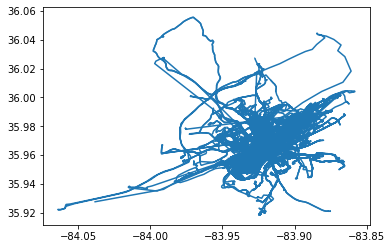

In [35]:
scooters_geo_start.plot()

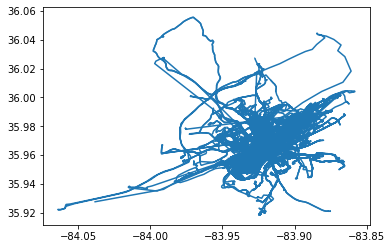

In [36]:
scooters_geo_end.plot()